In [1]:
import numpy as np
import scipy.special as sci
import matplotlib
%matplotlib inline

In [2]:
with open('mnist_train.csv', 'r') as f:
    training_file = f.readlines()

training_data = []
for line in training_file:
    line = line.split(',')
    training_data.append([int(line[0]), [int(num) / 255 * 0.98 + 0.01 for num in line[1:]]])
    
with open('mnist_train_100.csv', 'r') as f:
    testing_file = f.readlines()
    
testing_data = []
for line in testing_file:
    line = line.split(',')
    num = int(line[0])
    testing_data.append([int(line[0]), [int(num) / 255 * 0.98 + 0.01 for num in line[1:]]])


In [3]:
expected_nums = {
    0: [0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    1: [0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    2: [0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    3: [0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    4: [0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01],
    5: [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01],
    6: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01],
    7: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01],
    8: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01],
    9: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99]
}

In [4]:
from neuralnetwork import NeuralNetwork as NN
num_net = NN(784, 100, 10, 0.2)

for data in training_data:
    num_net.train(data[1], expected_nums[data[0]])


Guess: 3, Target: 1
Number likelihood: [ 0.00281242  0.13431563  0.01895366  0.14420111  0.02262603  0.05939595
  0.0367569   0.00362197  0.00307585  0.13045548]
Guess: 3, Target: 9
Number likelihood: [  9.67190553e-05   1.16422717e-01   5.33481083e-03   2.91132265e-01
   5.38842506e-03   4.70842172e-02   2.77656194e-04   4.75412103e-03
   4.23797575e-02   7.18732614e-03]
Guess: 8, Target: 9
Number likelihood: [ 0.37385886  0.00138577  0.00305105  0.02300724  0.00220277  0.01930732
  0.03405172  0.00109412  0.42573818  0.05431874]
Performance: 3.0% error rate
Performance: 97.0% accuracy


Human viewable:
Guess: 1, Target: 1


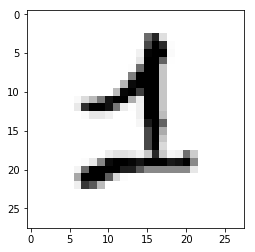

In [7]:
correct = 0
images = []
for i in range(len(testing_data)):
    test_input = testing_data[i]
    nn_output = num_net.query(test_input[1])
    guess = np.argmax(nn_output)

    if guess == test_input[0]:
        correct += 1
    else:
        images.append(np.array(test_input[1]).reshape(28, 28))
        print('Guess: '+str(guess)+', Target: '+str(test_input[0]))
        print('Number likelihood: '+str(nn_output))

correctness = float(correct/len(testing_data))*100
print('Performance: '+str(100 - correctness)+'% error rate')
print('Performance: '+str(correctness)+'% accuracy')

print('\n\nHuman viewable:')
print('Guess: '+str(guess)+', Target: '+str(test_input[0]))
matplotlib.pyplot.imshow(images[0], cmap='Greys', interpolation='None')
# print('Accuracy: '+str(correct)+'%')

img = result.reshape(28, 28)
matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')

In [11]:
thoughts = NN.thought_process(inputs=expected_nums[1])
matplotlib.pyplot.imshow(thoughts, cmap='Greys', interpolation='None')

TypeError: thought_process() missing 1 required positional argument: 'self'